No handles with labels found to put in legend.


eig vector
 [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]
eig val
 [0.0490834 +0.j 1.28402771+0.j]
k= (array([1], dtype=int32),)
 vector=
 [-0.6778734  -0.73517866]
[[ 1.11962288 -2.23216142]
 [ 1.43759542  0.37338909]
 [ 1.67911318 -2.39638873]
 [ 1.4251554  -1.67840165]
 [ 1.08523973 -3.07999265]
 [ 1.47002063 -2.31714034]
 [ 0.94491349 -1.30508179]
 [ 1.34115545 -0.25961907]
 [ 1.31250282 -0.9661451 ]
 [ 1.1320629  -0.18037068]]


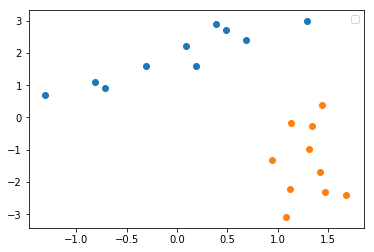

0.5549000000000001

In [85]:
import numpy as np
import pandas as pd
import math
import scipy.linalg as lin
import matplotlib.pyplot as plt
T=np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1])
T=T-1.81
S=S-1.91
S=np.array([2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9])
T=T[:,np.newaxis]
S=np.reshape(S,(len(S),1))
#兩個特徵向量
X=np.hstack((T,S))
#計算共變異數 矩陣
cov_mat = np.cov(X.T)
eigen_val, eigen_vec = lin.eig(cov_mat)
print('eig vector\n',eigen_vec)
print('eig val\n',eigen_val)
k=np.where( eigen_val==np.max(eigen_val) ) 
print('k=',k)
value =eigen_val[np.where( eigen_val==np.max(eigen_val) )]
vector =np.array(eigen_vec[:,1 ].T)
print(' vector=\n',vector)
newX=X.dot(eigen_vec)
print(newX)
plt.scatter(T,S,)
plt.scatter(newX[:,0],newX[:,1],)
plt.legend()
plt.show()
np.var(X[:,0])

In [94]:
import pandas as pd

df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None) # 加载葡萄酒数据集

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values # 把数据与标签拆分开来
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0) # 把整个数据集的70%分为训练集，30%为测试集

# 下面3行代码把数据集标准化为单位方差和0均值
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
#13 特徵向量
X_train.shape
cov_mat = np.cov(X_train_std.T)
cov_mat.shape # 输出为(13, 13）
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('eign vals:',eigen_vals)
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))] # 把特征值和对应的特征向量组成对
eigen_pairs.sort(reverse=True) # 用特征值排序
print(eigen_pairs[0][1])
eigen_pairs

eign vals: [4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]
[ 0.14669811 -0.24224554 -0.02993442 -0.25519002  0.12079772  0.38934455
  0.42326486 -0.30634956  0.30572219 -0.09869191  0.30032535  0.36821154
  0.29259713]


[(4.892308303273744,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.4663503157592275,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048457,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.012334620904496,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.8490645933450256,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.14064543, 